In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

File can be downloaded from here: https://docs.google.com/spreadsheets/d/1cM95PSnM1xCgJNBHh0r4MInoTuqDYHQ7oAkzrVExNwM/edit?usp=sharing

In [ ]:
df = pd.read_csv('pupils-ex.csv')

In [ ]:
df

,Name,Age,Country,Height,Weight,avg,income,rooms,family,type,gen
0,adar,6,SP,113.0,30,70,16700,7,6,1,M
1,agam,6,GR,172.0,71,92,9200,5,4,2,F
2,avi,7,NaN,143.0,58,82,12000,3,7,1,M
3,dani,7,US,NaN,70,90,15000,4,4,2,M
4,dina,7,ISR,110.0,26,64,10000,6,8,1,F
5,efrat,7,NaN,115.0,33,75,8000,5,5,3,F
6,ehud,8,ISR,155.0,66,85,18000,2,7,1,M
7,eli,8,NaN,155.0,61,84,8900,7,10,2,M
8,ester,8,ISR,NaN,48,79,19600,2,4,1,F
9,evyatar,8,NaN,110.0,34,72,7600,3,4,1,M


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Name     30 non-null     object 
 1   Age      30 non-null     int64  
 2   Country  21 non-null     object 
 3   Height   24 non-null     float64
 4   Weight   30 non-null     int64  
 5   avg      30 non-null     int64  
 6   income   30 non-null     int64  
 7   rooms    30 non-null     int64  
 8   family   30 non-null     int64  
 9   type     30 non-null     int64  
 10  gen      30 non-null     object 
dtypes: float64(1), int64(7), object(3)
memory usage: 2.7+ KB


Checcking for null values

In [ ]:
df.isnull().sum()

Name       0
Age        0
Country    9
Height     6
Weight     0
avg        0
income     0
rooms      0
family     0
type       0
gen        0
dtype: int64

Searching for anomalies

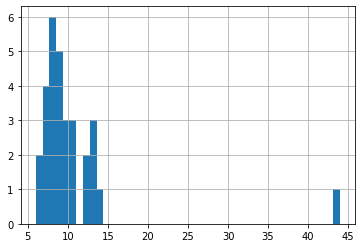

In [ ]:
df.Age.hist(bins=45)

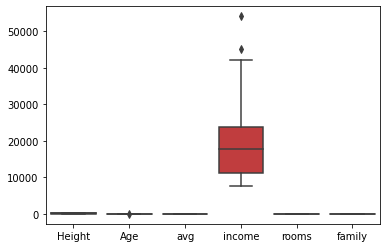

In [ ]:
import seaborn as sns
sns.boxplot(data=df[['Height', 'Age', 'avg', 'income', 'rooms', 'family']])

In [ ]:
df.describe()

,Age,Height,Weight,avg,income,rooms,family,type
count,30.000000,24.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,10.566667,139.125000,51.500000,80.500000,20096.666667,4.366667,5.833333,1.833333
std,6.688556,27.291203,18.104581,7.942683,11943.270601,1.629117,1.743626,0.833908
min,6.000000,90.000000,26.000000,64.000000,7600.000000,2.000000,3.000000,1.000000
25%,8.000000,114.500000,34.000000,74.000000,11175.000000,3.000000,4.250000,1.000000
50%,9.000000,137.000000,53.000000,82.000000,17650.000000,4.500000,6.000000,2.000000
75%,11.000000,159.750000,65.500000,85.750000,23750.000000,5.750000,7.000000,2.750000
max,44.000000,192.000000,90.000000,94.000000,54100.000000,7.000000,10.000000,3.000000


Filling missing values with the mean

In [ ]:
df.Height.fillna(df.Height.mean(),inplace=True)

In [ ]:
df.Country.fillna(df.Country.mode()[0],inplace=True)

Corrcting age errors

In [ ]:
df.loc[df.Age > 12,'Age'] = 12

Anohter option of filling up missing values

In [ ]:
df.loc[df.Height.isnull(),'Height'] = df.Age*12

Another option of filling missing values

In [ ]:
ls = [2,4,6,8,10]*10
for k,v in df.iterrows():
    if np.isnan(v.Height):
            df.loc[k,'Height'] = ls[v.Age]

In [ ]:
df.isnull().sum()

Name       0
Age        0
Country    9
Height     0
Weight     0
avg        0
income     0
rooms      0
family     0
type       0
gen        0
dtype: int64

Drop type since we don't think it's relevant

In [ ]:
df.drop(['type'],axis=1,inplace=True)

Replace `gen` with numeric values

In [ ]:
df['gen'].replace({'M':1 , 'F':2},inplace=True)

Feature engineering - create additional values like 'namelen' 

In [ ]:
df['namelen']=df.Name.apply(len)

Feature engineering - create additional values like height group (ordinal)

In [ ]:
np.digitize(df.Height, [110,130,150,160], right=True)

array([1, 4, 2, 2, 0, 1, 3, 3, 2, 0, 0, 2, 4, 2, 2, 1, 0, 2, 3, 4, 1, 4,
       2, 2, 4, 1, 2, 4, 1, 0])

Another option for height group

In [ ]:
df['Height Category'] = pd.cut(df.Height,bins=3,labels=[1,2,3])

In [ ]:
df.drop(['Name'], axis=1, inplace=True)

KeyError: ignored

get_dummies

In [ ]:
df = pd.get_dummies(df, columns=['Country'])

In [ ]:
df

,Age,Height,Weight,avg,income,rooms,family,gen,namelen,Height Category,Country_EN,Country_FR,Country_GR,Country_ISR,Country_SP,Country_US
0,6,113.000,30,70,16700,7,6,1,4,1,0,0,0,0,1,0
1,6,172.000,71,92,9200,5,4,2,4,3,0,0,1,0,0,0
2,7,143.000,58,82,12000,3,7,1,3,2,0,0,0,1,0,0
3,7,139.125,70,90,15000,4,4,1,4,2,0,0,0,0,0,1
4,7,110.000,26,64,10000,6,8,2,4,1,0,0,0,1,0,0
5,7,115.000,33,75,8000,5,5,2,5,1,0,0,0,1,0,0
6,8,155.000,66,85,18000,2,7,1,4,2,0,0,0,1,0,0
7,8,155.000,61,84,8900,7,10,1,3,2,0,0,0,1,0,0
8,8,139.125,48,79,19600,2,4,2,5,2,0,0,0,1,0,0
9,8,110.000,34,72,7600,3,4,1,7,1,0,0,0,1,0,0


In [ ]:
X = df.drop(['income'], axis=1)
y = df['income']

Split train/test

In [ ]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [ ]:
X_train.shape

(22, 15)

In [ ]:
X_test.shape

(8, 15)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler

sc_x = StandardScaler()
X_train_s = sc_x.fit_transform(X_train)
X_test_s = sc_x.transform(X_test)


Usally, there is not enoght data in order to produce a good perdication. We'll try anyways...

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Predictions

In [ ]:
y_pred = lm.predict(X_test)

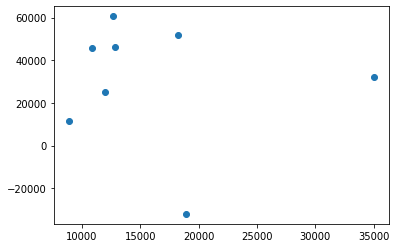

In [ ]:
plt.scatter(y_test,y_pred)

Show score

In [ ]:
from sklearn.metrics import r2_score 

r2_score(y_test, y_pred)

-16.463265745763557

Can also be calculated like this. From now, we will be using mostly in this syntax

In [ ]:
lm.score(X_test, y_test)

-16.463265745763557

Show coefficients

In [ ]:
coeff_df = pd.DataFrame(lm.coef_,X.columns, columns=['score'])
coeff_df['abs'] = coeff_df['score'].apply(np.abs)
coeff_df.sort_values(by='abs', ascending=False)

,score,abs
Height Category,5.051913e+04,5.051913e+04
Country_US,-2.221456e+04,2.221456e+04
Country_EN,2.017727e+04,2.017727e+04
Country_SP,1.112594e+04,1.112594e+04
Country_GR,-9.242378e+03,9.242378e+03
gen,-2.583271e+03,2.583271e+03
Height,-1.622489e+03,1.622489e+03
avg,-1.392083e+03,1.392083e+03
Weight,1.368514e+03,1.368514e+03
rooms,1.123905e+03,1.123905e+03


This is very bad. In this case we better of taking the income mean. This will be the best prediction modle we can give under these circumstances

##Additional Tools to Evaluate The Model

###Bias

Evaluate the model on the training data set.

In [ ]:
lm.score(X_train, y_train)

0.6837110315295478

###Variance

Evaluate the model on the testing data

In [ ]:
lm.score(X_test, y_test)

-16.463265745763557

In this case, we have high bias (the score of the training data set is low, error is high - the model underfits the data) and high variance (the differenc bwetween the test score and the train score is high).

See full explanation here: https://colab.research.google.com/drive/13jPckaWv48bII2LRio4rRW2L7fF9FqPV?usp=sharing

### Cross Validation Score
Additional read: https://scikit-learn.org/stable/modules/cross_validation.html

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lm, X, y, cv=5)

scores

array([-156.44324374,   -7.60883255,   -1.85496317,   -0.9468859 ,
         -1.11033938])

The accuracy of the model over these 5 folds is the mean

In [ ]:
scores.mean()

-33.592852946584195

The STD is the deviation between the different folds. In a working model this should be as low as possible (usally around ±0)

A high STD means that the data tested in each folds acts differently

In [ ]:
scores.std()

61.474473295392535